In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2,NaN,3.0,1,1.0
1,5.0,4.0,4.0,5.0,7,10.0,3.0,2,1.0
2,3.0,1.0,1.0,1.0,2,2.0,3.0,1,1.0
3,6.0,NaN,8.0,1.0,3,4.0,3.0,7,1.0
4,4.0,1.0,1.0,3.0,2,1.0,3.0,1,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2,1.0,NaN,1,1.0
679,2.0,1.0,1.0,1.0,2,1.0,3.0,1,1.0
680,5.0,10.0,10.0,10.0,4,NaN,5.0,6,3.0
681,NaN,1.0,1.0,3.0,2,1.0,1.0,1,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	50
float64		column 2	16
float64		column 3	64
float64		column 4	32
int64		column 5	0
float64		column 6	64
float64		column 7	34
int64		column 8	0
float64		column 9	32


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,633.000000,667.000000,619.000000,651.000000,683.000000,619.000000,649.000000,683.000000,651.000000
mean,4.401264,3.121439,3.137318,2.791091,3.234261,3.397415,3.409861,2.869693,1.603687
std,2.773655,3.035121,2.891604,2.840257,2.223085,3.536274,2.422559,3.052666,1.747856
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

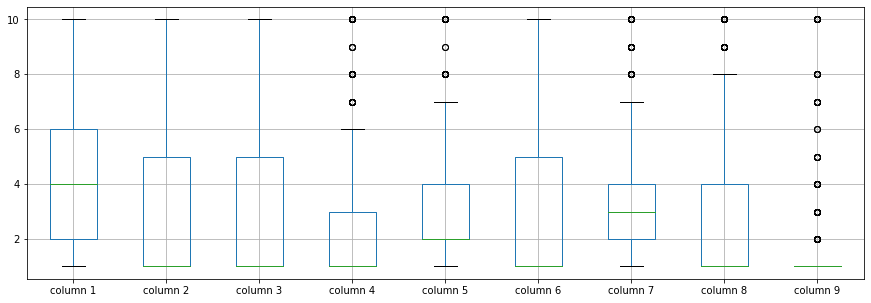

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.401264
column 2    3.121439
column 3    3.137318
column 4    2.791091
column 5    3.234261
column 6    3.397415
column 7    3.409861
column 8    2.869693
column 9    1.603687
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.619506,0.629498,0.454237,0.512929,0.597505,0.528681,0.506664,0.331493
column 2,0.619506,1.000000,0.900344,0.712502,0.752358,0.680635,0.747849,0.714377,0.465098
column 3,0.629498,0.900344,1.000000,0.681663,0.695218,0.738362,0.714073,0.716459,0.437893
column 4,0.454237,0.712502,0.681663,1.000000,0.590665,0.664377,0.659914,0.601735,0.424559
column 5,0.512929,0.752358,0.695218,0.590665,1.000000,0.574869,0.612551,0.628926,0.487340
column 6,0.597505,0.680635,0.738362,0.664377,0.574869,1.000000,0.656860,0.590574,0.316526
column 7,0.528681,0.747849,0.714073,0.659914,0.612551,0.656860,1.000000,0.659414,0.338764
column 8,0.506664,0.714377,0.716459,0.601735,0.628926,0.590574,0.659414,1.000000,0.432889
column 9,0.331493,0.465098,0.437893,0.424559,0.487340,0.316526,0.338764,0.432889,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+65,9+65+65,9+65+65,9+65+65+65+65,9+65+65+65+65+65,9+65+65+65+65+65+65,9+65+65+65+65+65,9+65+65+65+65,9+65+65+65,9+65+65,9+65,9], vae_layer = False, seed = 650)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.58256762368338
Epoch: 1 , loss: 34.3470272790818
Epoch: 2 , loss: 32.623783611115954
Epoch: 3 , loss: 30.75754083905901
Epoch: 4 , loss: 30.28107774825323
Epoch: 5 , loss: 29.78693539755685
Epoch: 6 , loss: 29.36533937000093
Epoch: 7 , loss: 29.048692930312384
Epoch: 8 , loss: 28.68241973150344
Epoch: 9 , loss: 27.893904549734934
Epoch: 10 , loss: 28.173202650887625
Epoch: 11 , loss: 27.57105032602946
Epoch: 12 , loss: 27.604728290012904
Epoch: 13 , loss: 27.553762231554305
Epoch: 14 , loss: 27.03656818753197
Epoch: 15 , loss: 26.946800867716473
Epoch: 16 , loss: 26.41498188745408
Epoch: 17 , loss: 26.87856002081008
Epoch: 18 , loss: 26.570701508294967
Epoch: 19 , loss: 25.98227037702288
Epoch: 20 , loss: 26.669655618213472
Epoch: 21 , loss: 25.6164493560791
Epoch: 22 , loss: 26.171816235496884
Epoch: 23 , loss: 26.440114157540457
Epoch: 24 , loss: 25.589296136583602
Epoch: 25 , loss: 25.485117548987

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    0.695237
column 4    1.000000
column 5    2.000000
column 6    1.000000
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.0,0.000000,0,-0.202415,0.000000,0,0.0
1,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.0
2,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.0
3,0.000000,-5.260801,0.0,0.000000,0,0.000000,0.000000,0,0.0
4,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.000000,0.0,0.000000,0,0.000000,-0.936901,0,0.0
679,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.0
680,0.000000,0.000000,0.0,0.000000,0,0.829481,0.000000,0,0.0
681,3.192519,0.000000,0.0,0.000000,0,0.000000,0.000000,0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(58.388078810871455, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.17412218613346078

In [18]:
new_df.iloc[66,:]

column 1    1.000000
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.000000
column 8    2.000000
column 9    0.590697
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.000000,1.0,1.000000,2,0.797585,3.000000,1,1.0
1,5.000000,4.000000,4.0,5.000000,7,10.000000,3.000000,2,1.0
2,3.000000,1.000000,1.0,1.000000,2,2.000000,3.000000,1,1.0
3,6.000000,2.739199,8.0,1.000000,3,4.000000,3.000000,7,1.0
4,4.000000,1.000000,1.0,3.000000,2,1.000000,3.000000,1,1.0
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.000000,1.0,1.000000,2,1.000000,1.063099,1,1.0
679,2.000000,1.000000,1.0,1.000000,2,1.000000,3.000000,1,1.0
680,5.000000,10.000000,10.0,10.000000,4,10.829481,5.000000,6,3.0
681,4.192519,1.000000,1.0,3.000000,2,1.000000,1.000000,1,1.0


In [20]:
imputations[-1].to_excel("BCW_NL_5(imp).xlsx", index=False, header=False)